# Sarcasm Detection
 **Acknowledgement**

Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

## Install `Tensorflow2.0` 

In [25]:
#!!pip uninstall tensorflow
#!pip install tensorflow==2.0.0
# already at tensorflow 2.0
import tensorflow as tf
tf.__version__
#!pip install google-colab

'2.2.0'

## Get Required Files from Drive

In [26]:
#from google.colab import drive
#drive.mount('/content/drive/')
#Already downloded files

In [27]:
#Set your project path 
project_path =  'data/'

#**## Reading and Exploring Data**

## Read Data "Sarcasm_Headlines_Dataset.json". Explore the data and get  some insights about the data. ( 4 marks)
Hint - As its in json format you need to use pandas.read_json function. Give paraemeter lines = True.

In [81]:
import numpy as np
import pandas as pd

df = pd.read_json(project_path + 'Sarcasm_Headlines_Dataset.json', lines=True)
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [82]:
df.shape

(26709, 3)

In [83]:
print(df.ndim)

2


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
article_link    26709 non-null object
headline        26709 non-null object
is_sarcastic    26709 non-null int64
dtypes: int64(1), object(2)
memory usage: 626.1+ KB


is_sarcastic
0    14985
1    11724
Name: is_sarcastic, dtype: int64


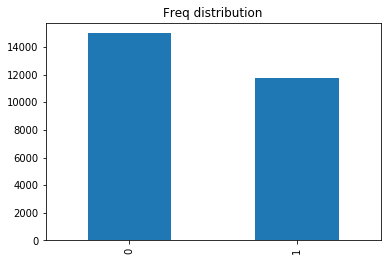

In [87]:
import matplotlib.pyplot as plt
print(df.groupby(["is_sarcastic"]) ["is_sarcastic"].count())
df["is_sarcastic"].value_counts().plot.bar(title='Freq distribution')

In [88]:
print('Average word length of headline in data is {0:.0f}.'.format(np.mean(df['headline'].apply(lambda x: len(x.split())))))

Average word length of headline in data is 10.


In [90]:
### Most common trigrams in the headline where it is sarcastic

import nltk
from nltk.util import ngrams

text = ' '.join(df.loc[df.is_sarcastic == 1, 'headline'].values)
text_trigrams = [i for i in ngrams(text.split(), 3)]

In [93]:
from collections import Counter
Counter(text_trigrams).most_common(30)

[(('new', 'study', 'finds'), 33),
 (('in', 'front', 'of'), 22),
 (('state', 'of', 'the'), 20),
 (('of', 'the', 'union'), 19),
 (('majority', 'of', 'americans'), 18),
 (('new', 'line', 'of'), 16),
 (('for', 'first', 'time'), 16),
 (('in', 'middle', 'of'), 16),
 (('announces', 'plans', 'to'), 16),
 (('report:', 'majority', 'of'), 16),
 (("can't", 'wait', 'to'), 15),
 (('announces', 'plan', 'to'), 13),
 (("'game", 'of', "thrones'"), 12),
 (('has', 'no', 'idea'), 12),
 (('just', 'going', 'to'), 12),
 (('running', 'out', 'of'), 11),
 (('area', 'man', 'has'), 11),
 (('looking', 'forward', 'to'), 11),
 (('going', 'to', 'be'), 10),
 (('of', 'americans', 'would'), 10),
 (('first', 'time', 'in'), 9),
 (('no', 'one', 'in'), 9),
 (('can', 'already', 'tell'), 9),
 (('to', 'find', 'out'), 9),
 (('up', 'all', 'night'), 9),
 (('get', 'out', 'of'), 9),
 (('finds', 'majority', 'of'), 9),
 (('in', 'order', 'to'), 9),
 (('not', 'sure', 'how'), 9),
 (('to', 'white', 'house'), 9)]

<b>Observations
    1. Column article_link has non related data and is of no use from model's perspective. Can be dropped.
    2. We have more non sarcastic values than sarcastic ones.
    3. Looks like we have too many common words

## Drop `article_link` from dataset. ( 2 marks)
As we only need headline text data and is_sarcastic column for this project. We can drop artical link column here.

In [29]:
df.drop(['article_link'], axis=1)
df.head(10)

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
5,https://www.huffingtonpost.com/entry/advancing...,advancing the world's women,0
6,https://www.huffingtonpost.com/entry/how-meat-...,the fascinating case for eating lab-grown meat,0
7,https://www.huffingtonpost.com/entry/boxed-col...,"this ceo will send your kids to school, if you...",0
8,https://politics.theonion.com/top-snake-handle...,top snake handler leaves sinking huckabee camp...,1
9,https://www.huffingtonpost.com/entry/fridays-m...,friday's morning email: inside trump's presser...,0


In [68]:
df['headline'].head(10)

0    former versace store clerk sues over secret 'b...
1    the 'roseanne' revival catches up to our thorn...
2    mom starting to fear son's web series closest ...
3    boehner just wants wife to listen, not come up...
4    j.k. rowling wishes snape happy birthday in th...
5                          advancing the world's women
6       the fascinating case for eating lab-grown meat
7    this ceo will send your kids to school, if you...
8    top snake handler leaves sinking huckabee camp...
9    friday's morning email: inside trump's presser...
Name: headline, dtype: object

## Get the Length of each line and find the maximum length. ( 4 marks)
As different lines are of different length. We need to pad the our sequences using the max length.

In [30]:
df.shape
df['headline_length'] = df['headline'].apply(len)
print(df['headline_length'])

# print the maximum length
print('Headline column max length is ', max(df.headline.map(str).apply(len)))

0         78
1         84
2         79
3         84
4         64
5         27
6         46
7         67
8         50
9         59
10        63
11        59
12        70
13        64
14        51
15        64
16        88
17        50
18        58
19        20
20        50
21       111
22        66
23        42
24        71
25        37
26        58
27        22
28        57
29        40
        ... 
26679     74
26680     83
26681     72
26682     61
26683     58
26684     83
26685     46
26686     79
26687     59
26688     92
26689     67
26690     60
26691     77
26692     38
26693     55
26694     60
26695     74
26696     67
26697     74
26698     76
26699     63
26700     72
26701     40
26702     72
26703     59
26704     36
26705     23
26706     21
26707     60
26708     33
Name: headline_length, Length: 26709, dtype: int64
Headline column max length is  254


#**## Modelling**

## Import required modules required for modelling.

In [31]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential

# Set Different Parameters for the model. ( 2 marks)

In [32]:
max_features = 10000
maxlen = 254
embedding_size = 200

## Apply Keras Tokenizer of headline column of your data.  ( 4 marks)
Hint - First create a tokenizer instance using Tokenizer(num_words=max_features) 
And then fit this tokenizer instance on your data column df['headline'] using .fit_on_texts()

In [33]:
for idx,row in df.iterrows():
    row[0] = row[0].replace('rt',' ')
    
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(df['headline'].values)

# Define X and y for your model.

In [34]:
X = tokenizer.texts_to_sequences(df['headline'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(df['is_sarcastic'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])


Number of Samples: 26709
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0  

## Get the Vocabulary size ( 2 marks)
Hint : You can use tokenizer.word_index.

In [40]:
num_words = len(tokenizer.word_index)+1
num_words

29657

#**## Word Embedding**

## Get Glove Word Embeddings

In [36]:
glove_file = project_path + "glove.6B.zip"

In [37]:
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

# Get the Word Embeddings using Embedding file as given below.

In [38]:
EMBEDDING_FILE = 'data/glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE,encoding="utf8"):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd



# Create a weight matrix for words in training docs

In [41]:
embedding_matrix = np.zeros((num_words, 200))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

len(embeddings.values())

400000

## Create and Compile your Model  ( 7 marks)
Hint - Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.


In [60]:
### Embedding layer for hint 
## model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix]))
### Bidirectional LSTM layer for hint 
## model.add(Bidirectional(LSTM(128, return_sequences = True)))

embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
#model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])

# Fit your model with a batch size of 100 and validation_split = 0.2. and state the validation accuracy ( 5 marks)


In [61]:
batch_size = 100
epochs = 5

## Add your code here ##
history = model.fit(X, y, epochs = 15, batch_size=batch_size, validation_split = 0.2,verbose = 2)

Epoch 1/15
214/214 - 495s - loss: 0.6932 - accuracy: 0.5081 - val_loss: 0.6931 - val_accuracy: 0.4946
Epoch 2/15
214/214 - 497s - loss: 0.6931 - accuracy: 0.5071 - val_loss: 0.6931 - val_accuracy: 0.5140
Epoch 3/15
214/214 - 465s - loss: 0.6931 - accuracy: 0.4987 - val_loss: 0.6931 - val_accuracy: 0.5129
Epoch 4/15
214/214 - 482s - loss: 0.6931 - accuracy: 0.5054 - val_loss: 0.6931 - val_accuracy: 0.5625
Epoch 5/15
214/214 - 488s - loss: 0.6931 - accuracy: 0.5064 - val_loss: 0.6931 - val_accuracy: 0.4622
Epoch 6/15
214/214 - 483s - loss: 0.6931 - accuracy: 0.4967 - val_loss: 0.6931 - val_accuracy: 0.4491
Epoch 7/15
214/214 - 452s - loss: 0.6931 - accuracy: 0.4928 - val_loss: 0.6931 - val_accuracy: 0.4708
Epoch 8/15
214/214 - 446s - loss: 0.6931 - accuracy: 0.4966 - val_loss: 0.6931 - val_accuracy: 0.5227
Epoch 9/15
214/214 - 445s - loss: 0.6931 - accuracy: 0.4964 - val_loss: 0.6931 - val_accuracy: 0.5623
Epoch 10/15
214/214 - 444s - loss: 0.6931 - accuracy: 0.4986 - val_loss: 0.6931 - 

#### Accuracy at 0.46 is not good enough.  Let's tune the model further by changing few parameters
1. lstm_out has been changed to 128 and we will be using weights from embedding matrix
2. Activation function has been changed to sigmoid in place of softmax 

In [62]:
embed_dim = 128

model = Sequential()
model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix]))
#model.add(SpatialDropout1D(0.4))
model.add(Bidirectional(LSTM(128, return_sequences = True)))
#model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])

In [74]:
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 200)         5931400   
_________________________________________________________________
bidirectional (Bidirectional (None, None, 256)         336896    
_________________________________________________________________
dropout (Dropout)            (None, None, 256)         0         
_________________________________________________________________
dense_9 (Dense)              (None, None, 1)           257       
Total params: 6,268,553
Trainable params: 6,268,553
Non-trainable params: 0
_________________________________________________________________
None


In [63]:
batch_size = 100
epochs = 5

## Add your code here ##
history = model.fit(X, y, epochs = 5, batch_size=batch_size, validation_split = 0.2)

Epoch 1/5
214/214 [==============================] - 364s 2s/step - loss: 0.6740 - accuracy: 0.5762 - val_loss: 0.6743 - val_accuracy: 0.5753
Epoch 2/5
214/214 [==============================] - 326s 2s/step - loss: 0.6364 - accuracy: 0.6120 - val_loss: 0.5052 - val_accuracy: 0.7903
Epoch 3/5
214/214 [==============================] - 328s 2s/step - loss: 0.6290 - accuracy: 0.6185 - val_loss: 0.5956 - val_accuracy: 0.6577
Epoch 4/5
214/214 [==============================] - 328s 2s/step - loss: 0.5170 - accuracy: 0.7632 - val_loss: 0.6413 - val_accuracy: 0.5780
Epoch 5/5
214/214 [==============================] - 331s 2s/step - loss: 0.4927 - accuracy: 0.7518 - val_loss: 0.4877 - val_accuracy: 0.7789


<b>We ran the model for 5 epochs and val accuracy bumped to 0.77 which is far better than what we previously had
<br>We can train model further for better accuracy  </b>
<br><br> Running a quick check


In [76]:
test_headline = ['mom starting to fear son\'s web series closest thing she will have to grandchild']
test_headline = tokenizer.texts_to_sequences(test_headline)
test_headline = pad_sequences(test_headline, maxlen=254, dtype='int32', value=0)

sentiment = model.predict(test_headline,batch_size=1,verbose = 2)[0]

if(np.argmax(sentiment) == 0):
    print("Non-sarcastic")
else:
    print("Sarcasm")

1/1 - 0s
Sarcasm


#### Conclusion
1. We are able to get accuracy of 0.45-0.5 with softmax as activation
2. We tuned further to use sigmoid as activation function and chaging lstm vector output size and got decent accuracy of almost .78
3. The model can be tuned further and tested with different hyperparameter values.